In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\hp\Documents\machine learning\KNN\Ml project\smart_home_energy_consumption_large.csv")

In [3]:
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [4]:
df.tail()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
99995,124,Microwave,0.42,09:56,2023-09-28,20.5,Summer,1
99996,184,Computer,0.71,12:48,2023-05-27,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,2023-02-18,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,2023-04-20,3.7,Spring,1
99999,429,Fridge,0.37,18:46,2023-02-27,36.0,Winter,5


In [5]:
df.shape

(100000, 8)

In [6]:
df.dtypes

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

Data Cleaning

In [7]:
df.isna().sum()

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

In [8]:
df.duplicated().sum()

0

outlier

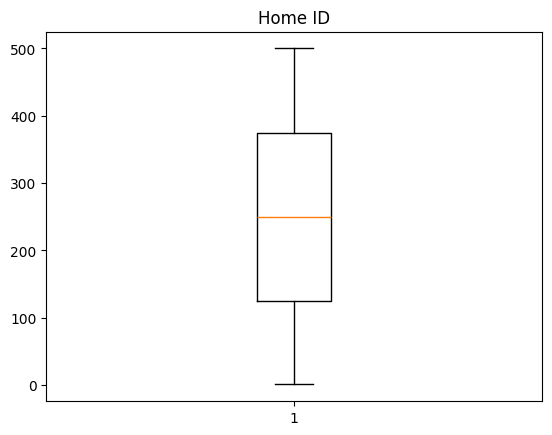

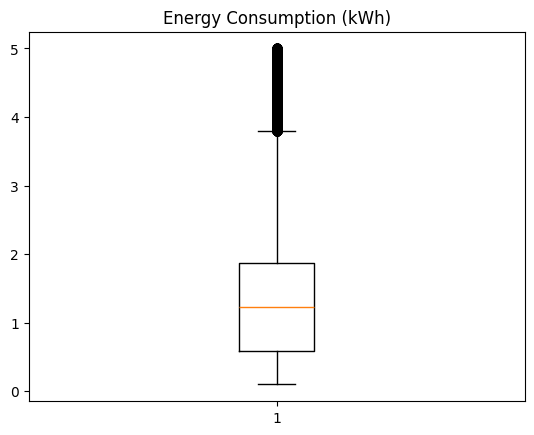

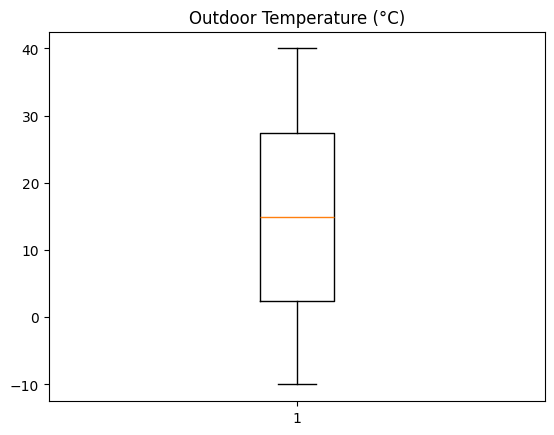

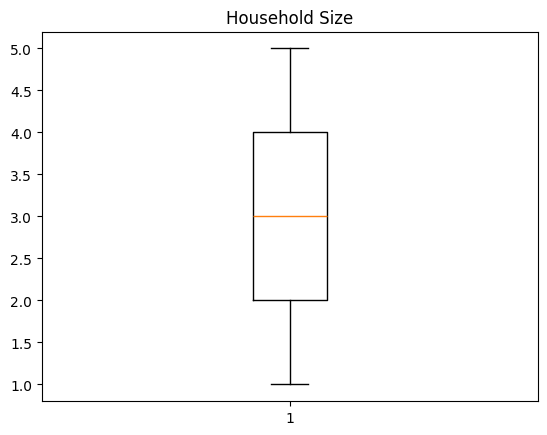

In [9]:
for i in df:
    if df[i].dtype=="float64" or df[i].dtype=="int64":
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

DATA PREPROCESSING

Feature Engineering

In [10]:
df.dtypes

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

In [11]:
df.drop(columns=["Home ID"],inplace=True)

time

In [12]:
df['Time']=df['Time'].str.split(':').str[0].astype('int64')

In [13]:
df['Time'].dtype

dtype('int64')

In [14]:
def time_category(time):
    if 5 < time < 12:
        return "Morning"
    elif 12 <= time <15:
        return "Afternoon"
    elif 15 <= time <19:
        return "Evening"
    else:
        return "Night"
    
df["time_category"]=df["Time"].apply(time_category)

In [15]:
df.drop(columns=["Time"],inplace=True)

In [16]:
df["time_category"]

0            Night
1            Night
2          Morning
3            Night
4            Night
           ...    
99995      Morning
99996    Afternoon
99997        Night
99998    Afternoon
99999      Evening
Name: time_category, Length: 100000, dtype: object

Date

In [17]:
df["Date"]=pd.to_datetime(df['Date'])
df['Year']=df["Date"].dt.year

In [18]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Weekday']=df['Date'].dt.weekday

In [19]:
df.drop(columns=["Date"],inplace=True)

Encoding

In [20]:
for i in df:
    if df[i].dtype=="object":
        print(i)
        print("********************")
        print(df[i].value_counts())

Appliance Type
********************
Appliance Type
Lights              10201
Dishwasher          10095
Air Conditioning    10067
Heater              10018
Washing Machine      9953
Microwave            9947
Computer             9944
Oven                 9939
Fridge               9931
TV                   9905
Name: count, dtype: int64
Season
********************
Season
Spring    25112
Fall      25026
Summer    24966
Winter    24896
Name: count, dtype: int64
time_category
********************
time_category
Night        45849
Morning      25088
Evening      16533
Afternoon    12530
Name: count, dtype: int64


In [21]:
# Appliance Type,season - onehot
# time category - ordinal

onehot

In [22]:
onehot=OneHotEncoder(sparse_output=False,drop='first')
res=onehot.fit_transform(df[["Appliance Type","Season"]])

In [23]:
df.drop(columns=['Appliance Type','Season'],inplace=True)

In [24]:
res=pd.DataFrame(res,columns=onehot.get_feature_names_out())

In [25]:
df.shape

(100000, 8)

In [26]:
res.shape

(100000, 12)

In [27]:
df=df.join(res)

ordinal

In [28]:
ordinal=OrdinalEncoder(categories=[["Morning","Afternoon","Evening","Night"]])
df["time_category"]=ordinal.fit_transform(df[["time_category"]])

In [29]:
df

,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size,time_category,Year,Month,Day,Weekday,Appliance Type_Computer,Appliance Type_Dishwasher,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
0,0.20,-1.0,2,3.0,2023,12,2,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.23,31.1,5,3.0,2023,8,6,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,21.3,3,0.0,2023,11,21,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.92,-4.2,1,3.0,2023,1,21,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.44,34.5,5,3.0,2023,8,26,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.42,20.5,1,0.0,2023,9,28,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,0.71,-5.4,2,1.0,2023,5,27,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,0.25,35.6,3,3.0,2023,2,18,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,2.69,3.7,1,1.0,2023,4,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Scaling

In [30]:
x=df.drop(columns=["Energy Consumption (kWh)"])
y=df["Energy Consumption (kWh)"]

In [31]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.4,random_state=42)

model training

In [33]:
# models=[KNeighborsRegressor(),SVR(),LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]
# for i in models:
#     i.fit(x_train,y_train)
#     y_pred=i.predict(x_test)
#     print(i)
#     print("******************************")
#     print(f"R2 score : {r2_score(y_test,y_pred)}")
#     print(f"Mean absolute error : {mean_absolute_error(y_test,y_pred)}")
#     print(f"Root mean squared error : {root_mean_squared_error(y_test,y_pred)}")
#     print(f"------------------------------------------------------------------------------------------------------")

In [34]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred=model.predict(x_test)

In [36]:
print(f"R2 score : {r2_score(y_test,y_pred)}")
print(f"Mean absolute error : {mean_absolute_error(y_test,y_pred)}")
print(f"Root mean squared error : {root_mean_squared_error(y_test,y_pred)}")

R2 score : 0.7482163231770167
Mean absolute error : 0.4811785020949692
Root mean squared error : 0.5929426115256411


In [37]:
dict1={'scaler':minmax,'onehot':onehot,'model':model,"ordinal":ordinal}

In [38]:
import pickle
with open('smart_home_.pkl','wb') as obj1:
  pickle.dump(dict1,obj1)

In [39]:
with open('smart_home_.pkl','rb') as obj2:
  var1=pickle.load(obj2)

In [40]:
var1

{'scaler': MinMaxScaler(),
 'onehot': OneHotEncoder(drop='first', sparse_output=False),
 'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...),
 'ordinal': OrdinalEncoder(categories=[['Morning', 'Afternoon', 'Evening', 'Night']])}